In [5]:
# Import libraries and configure pandas to display all columns and rows.
import pandas as pd 
pd.set_option('display.max_columns' , None)
pd.set_option('display.max_rows' , None)
import numpy as np

In [7]:
# Load the property price dataset into a DataFrame called ppt
ppt=pd.read_csv(r"C:\Users\aishwary hatakar\Downloads\Property_Price_Train.csv")

In [9]:
# To build a predictive model which can predict Property price
# target veriable is Sale_Price
ppt.head(5)


,Id,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Lane_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,Property_Slope,Neighborhood,Condition1,Condition2,House_Type,House_Design,Overall_Material,House_Condition,Construction_Year,Remodel_Year,Roof_Design,Roof_Quality,Exterior1st,Exterior2nd,Brick_Veneer_Type,Brick_Veneer_Area,Exterior_Material,Exterior_Condition,Foundation_Type,Basement_Height,Basement_Condition,Exposure_Level,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Total_Basement_Area,Heating_Type,Heating_Quality,Air_Conditioning,Electrical_System,First_Floor_Area,Second_Floor_Area,LowQualFinSF,Grade_Living_Area,Underground_Full_Bathroom,Underground_Half_Bathroom,Full_Bathroom_Above_Grade,Half_Bathroom_Above_Grade,Bedroom_Above_Grade,Kitchen_Above_Grade,Kitchen_Quality,Rooms_Above_Grade,Functional_Rate,Fireplaces,Fireplace_Quality,Garage,Garage_Built_Year,Garage_Finish_Year,Garage_Size,Garage_Area,Garage_Quality,Garage_Condition,Pavedd_Drive,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Pool_Quality,Fence_Quality,Miscellaneous_Feature,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
0,1,60,RLD,65.0,8450,Paved,NaN,Reg,Lvl,AllPub,I,GS,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,SS,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PC,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,TF,0,NaN,Attchd,2003.0,RFn,2,1085.793744,TA,TA,Y,163.788080,69.596115,20.337934,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RLD,80.0,9600,Paved,NaN,Reg,Lvl,AllPub,FR2P,GS,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,SS,MetalSd,MetalSd,NaN,0.0,TA,TA,CB,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,TF,1,TA,Attchd,1976.0,RFn,2,196.316304,TA,TA,Y,198.900074,74.716033,15.039392,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RLD,68.0,11250,Paved,NaN,IR1,Lvl,AllPub,I,GS,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,SS,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PC,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,TF,1,TA,Attchd,2001.0,RFn,2,218.068403,TA,TA,Y,26.127533,32.085268,-46.232198,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RLD,60.0,9550,Paved,NaN,IR1,Lvl,AllPub,C,GS,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,SS,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BT,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,TF,1,Gd,Detchd,1998.0,Unf,3,696.996439,TA,TA,Y,46.948018,40.181415,60.921821,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RLD,84.0,14260,Paved,NaN,IR1,Lvl,AllPub,FR2P,GS,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,SS,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PC,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,TF,1,TA,Attchd,2000.0,RFn,3,568.859882,TA,TA,Y,-10.626105,20.755323,21.788818,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [11]:
#  Check the shape (rows, columns) of the dataset.
ppt.shape

(1459, 81)

In [13]:
#  List all column names in the dataset.
ppt.columns

Index(['Id', 'Building_Class', 'Zoning_Class', 'Lot_Extent', 'Lot_Size',
       'Road_Type', 'Lane_Type', 'Property_Shape', 'Land_Outline',
       'Utility_Type', 'Lot_Configuration', 'Property_Slope', 'Neighborhood',
       'Condition1', 'Condition2', 'House_Type', 'House_Design',
       'Overall_Material', 'House_Condition', 'Construction_Year',
       'Remodel_Year', 'Roof_Design', 'Roof_Quality', 'Exterior1st',
       'Exterior2nd', 'Brick_Veneer_Type', 'Brick_Veneer_Area',
       'Exterior_Material', 'Exterior_Condition', 'Foundation_Type',
       'Basement_Height', 'Basement_Condition', 'Exposure_Level',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'Total_Basement_Area', 'Heating_Type', 'Heating_Quality',
       'Air_Conditioning', 'Electrical_System', 'First_Floor_Area',
       'Second_Floor_Area', 'LowQualFinSF', 'Grade_Living_Area',
       'Underground_Full_Bathroom', 'Underground_Half_Bathroom',
       'Full_Bathroom_Above_Grade', 'Ha

3 Data Cleaning

In [16]:
ppt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Id                         1459 non-null   int64  
 1   Building_Class             1459 non-null   int64  
 2   Zoning_Class               1459 non-null   object 
 3   Lot_Extent                 1200 non-null   float64
 4   Lot_Size                   1459 non-null   int64  
 5   Road_Type                  1459 non-null   object 
 6   Lane_Type                  91 non-null     object 
 7   Property_Shape             1459 non-null   object 
 8   Land_Outline               1459 non-null   object 
 9   Utility_Type               1459 non-null   object 
 10  Lot_Configuration          1459 non-null   object 
 11  Property_Slope             1459 non-null   object 
 12  Neighborhood               1459 non-null   object 
 13  Condition1                 1459 non-null   objec

In [18]:
# Display only columns with missing values.
ppt.isnull().sum()[ppt.isnull().sum() > 0]
#its only show null values 

Lot_Extent                259
Lane_Type                1368
Brick_Veneer_Type         871
Brick_Veneer_Area           8
Basement_Height            37
Basement_Condition         37
Exposure_Level             38
BsmtFinType1               37
BsmtFinType2               38
Electrical_System           1
Fireplace_Quality         689
Garage                     81
Garage_Built_Year          81
Garage_Finish_Year         81
Garage_Quality             81
Garage_Condition           81
Pool_Quality             1452
Fence_Quality            1178
Miscellaneous_Feature    1405
dtype: int64

In [20]:
# Identify columns with over 45% missing values.
ppt.isnull().sum()[ppt.isnull().sum() * 100 / ppt.shape[0] > 45]
#the columns which have more than 40% null values
# one the always remember while replacing the null" if you have null values more the 40% to 50% then we need to delet this columns

Lane_Type                1368
Brick_Veneer_Type         871
Fireplace_Quality         689
Pool_Quality             1452
Fence_Quality            1178
Miscellaneous_Feature    1405
dtype: int64

In [22]:
# We need to remove Id column because there is Unique values we dont want Unique values
ppt = ppt.drop(['Lane_Type' ,  'Brick_Veneer_Type' , 'Fireplace_Quality' , 'Pool_Quality' , 'Fence_Quality' , 'Miscellaneous_Feature','Id'],axis=1)

In [24]:
#  Check the shape again after dropping columns.
ppt.shape

(1459, 74)

In [26]:
ppt.head()

,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,Property_Slope,Neighborhood,Condition1,Condition2,House_Type,House_Design,Overall_Material,House_Condition,Construction_Year,Remodel_Year,Roof_Design,Roof_Quality,Exterior1st,Exterior2nd,Brick_Veneer_Area,Exterior_Material,Exterior_Condition,Foundation_Type,Basement_Height,Basement_Condition,Exposure_Level,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Total_Basement_Area,Heating_Type,Heating_Quality,Air_Conditioning,Electrical_System,First_Floor_Area,Second_Floor_Area,LowQualFinSF,Grade_Living_Area,Underground_Full_Bathroom,Underground_Half_Bathroom,Full_Bathroom_Above_Grade,Half_Bathroom_Above_Grade,Bedroom_Above_Grade,Kitchen_Above_Grade,Kitchen_Quality,Rooms_Above_Grade,Functional_Rate,Fireplaces,Garage,Garage_Built_Year,Garage_Finish_Year,Garage_Size,Garage_Area,Garage_Quality,Garage_Condition,Pavedd_Drive,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
0,60,RLD,65.0,8450,Paved,Reg,Lvl,AllPub,I,GS,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,SS,VinylSd,VinylSd,196.0,Gd,TA,PC,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,TF,0,Attchd,2003.0,RFn,2,1085.793744,TA,TA,Y,163.788080,69.596115,20.337934,0,0,0,0,2,2008,WD,Normal,208500
1,20,RLD,80.0,9600,Paved,Reg,Lvl,AllPub,FR2P,GS,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,SS,MetalSd,MetalSd,0.0,TA,TA,CB,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,TF,1,Attchd,1976.0,RFn,2,196.316304,TA,TA,Y,198.900074,74.716033,15.039392,0,0,0,0,5,2007,WD,Normal,181500
2,60,RLD,68.0,11250,Paved,IR1,Lvl,AllPub,I,GS,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,SS,VinylSd,VinylSd,162.0,Gd,TA,PC,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,TF,1,Attchd,2001.0,RFn,2,218.068403,TA,TA,Y,26.127533,32.085268,-46.232198,0,0,0,0,9,2008,WD,Normal,223500
3,70,RLD,60.0,9550,Paved,IR1,Lvl,AllPub,C,GS,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,SS,Wd Sdng,Wd Shng,0.0,TA,TA,BT,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,TF,1,Detchd,1998.0,Unf,3,696.996439,TA,TA,Y,46.948018,40.181415,60.921821,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RLD,84.0,14260,Paved,IR1,Lvl,AllPub,FR2P,GS,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,SS,VinylSd,VinylSd,350.0,Gd,TA,PC,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,TF,1,Attchd,2000.0,RFn,3,568.859882,TA,TA,Y,-10.626105,20.755323,21.788818,0,0,0,0,12,2008,WD,Normal,250000


In [28]:
#  Fill missing numeric values with the mean.
ppt.Lot_Extent = ppt.Lot_Extent.fillna(ppt.Lot_Extent.mean())

In [30]:
# if we have numerice and continuous column then we fill with mean

In [32]:
#  Fill missing categorical values with common/default values
ppt.Basement_Height = ppt.Basement_Height.fillna('TA')
ppt.Basement_Condition = ppt.Basement_Condition.fillna('TA')
ppt.Exposure_Level = ppt.Exposure_Level.fillna('No')
ppt.BsmtFinType1 = ppt.BsmtFinType1.fillna('Unf')
ppt.BsmtFinType2 = ppt.BsmtFinType2.fillna('Unf')
ppt.Electrical_System = ppt.Electrical_System.fillna('Sbrkr')
ppt.Garage = ppt.Garage.fillna('Attchd')
ppt.Garage_Built_Year = ppt.Garage_Built_Year.fillna(ppt.Garage_Built_Year.mean())
ppt.Garage_Finish_Year = ppt.Garage_Finish_Year.fillna('Unf')
ppt.Garage_Quality = ppt.Garage_Quality.fillna('TA')
ppt.Garage_Condition = ppt.Garage_Condition.fillna('TA')
ppt.Brick_Veneer_Area  = ppt.Brick_Veneer_Area .fillna(ppt.Brick_Veneer_Area.mean() )

In [34]:
#  Recheck for any remaining missing values.
ppt.isnull().sum()[ppt.isnull().sum() > 0]

Series([], dtype: int64)

In [36]:
ppt.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 74 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Building_Class             1459 non-null   int64  
 1   Zoning_Class               1459 non-null   object 
 2   Lot_Extent                 1459 non-null   float64
 3   Lot_Size                   1459 non-null   int64  
 4   Road_Type                  1459 non-null   object 
 5   Property_Shape             1459 non-null   object 
 6   Land_Outline               1459 non-null   object 
 7   Utility_Type               1459 non-null   object 
 8   Lot_Configuration          1459 non-null   object 
 9   Property_Slope             1459 non-null   object 
 10  Neighborhood               1459 non-null   object 
 11  Condition1                 1459 non-null   object 
 12  Condition2                 1459 non-null   object 
 13  House_Type                 1459 non-null   objec

In [38]:
# To Convert entire data into numeric we have to methods
# inplace=true the usecase of inplace=true is it will just reflect whatever changes you do its reflect in your original data


In [40]:
# Use replace fun and fill with manually
# exa 
# ppt.Brick_Veneer_Type = ppt.Brick_Veneer_Type.replace({'None':0, 'BrkFace':2, 'BrkCmn':3})

In [42]:
# or we use  Label Encoder
# its a function which we used to convert object columns into numeric columns.

Two options to convert categorical to numeric: Replace or LabelEncoder

In [44]:
#  Use LabelEncoder to convert all object (categorical) columns to numeric format
from sklearn.preprocessing import LabelEncoder

In [45]:
le = LabelEncoder()

In [46]:
ppt[ppt.select_dtypes(include=['object']).columns] = ppt[ppt.select_dtypes(include=['object']).columns] .apply(le.fit_transform)

In [50]:
ppt.shape

(1459, 74)

In [52]:
ppt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 74 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Building_Class             1459 non-null   int64  
 1   Zoning_Class               1459 non-null   int32  
 2   Lot_Extent                 1459 non-null   float64
 3   Lot_Size                   1459 non-null   int64  
 4   Road_Type                  1459 non-null   int32  
 5   Property_Shape             1459 non-null   int32  
 6   Land_Outline               1459 non-null   int32  
 7   Utility_Type               1459 non-null   int32  
 8   Lot_Configuration          1459 non-null   int32  
 9   Property_Slope             1459 non-null   int32  
 10  Neighborhood               1459 non-null   int32  
 11  Condition1                 1459 non-null   int32  
 12  Condition2                 1459 non-null   int32  
 13  House_Type                 1459 non-null   int32

In [54]:
#step 4 sampling

In [56]:
# Split data into training and testing sets (75%-25%) and separate features and target variable (Sale_Price)
from sklearn.model_selection import train_test_split

In [2]:
#ppt  =  df1

In [60]:
ppt_train, ppt_test = train_test_split(ppt , test_size=0.25)

In [62]:
ppt_train_x = ppt_train.iloc[: , 0:-1]
ppt_train_y = ppt_train.iloc[: , -1]

In [64]:
ppt_test_x = ppt_test.iloc[: , 0:-1]
ppt_test_y = ppt_test.iloc[: , -1]

In [66]:
ppt_train_x.head()

,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,Property_Slope,Neighborhood,Condition1,Condition2,House_Type,House_Design,Overall_Material,House_Condition,Construction_Year,Remodel_Year,Roof_Design,Roof_Quality,Exterior1st,Exterior2nd,Brick_Veneer_Area,Exterior_Material,Exterior_Condition,Foundation_Type,Basement_Height,Basement_Condition,Exposure_Level,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Total_Basement_Area,Heating_Type,Heating_Quality,Air_Conditioning,Electrical_System,First_Floor_Area,Second_Floor_Area,LowQualFinSF,Grade_Living_Area,Underground_Full_Bathroom,Underground_Half_Bathroom,Full_Bathroom_Above_Grade,Half_Bathroom_Above_Grade,Bedroom_Above_Grade,Kitchen_Above_Grade,Kitchen_Quality,Rooms_Above_Grade,Functional_Rate,Fireplaces,Garage,Garage_Built_Year,Garage_Finish_Year,Garage_Size,Garage_Area,Garage_Quality,Garage_Condition,Pavedd_Drive,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition
263,50,4,50.000000,5500,1,3,3,0,0,0,17,2,2,0,0,5,7,1929,2001,1,4,13,14,0.0,3,4,0,3,3,3,3,234,0,692,0,926,1,4,1,4,926,0,390,1316,1,0,1,0,3,1,3,6,7,0,6,1974.0,2,2,167.337076,4,4,2,403.949033,45.535499,-25.464349,0,0,0,0,4,2010,8,4
856,80,3,70.045833,10970,1,0,2,0,4,1,5,2,2,0,7,6,6,1978,1978,1,4,9,6,0.0,3,4,1,2,1,1,2,505,3,435,0,940,1,4,1,4,1026,0,0,1026,1,0,1,0,3,1,3,5,7,0,6,1981.0,2,2,513.695900,4,1,2,173.751763,61.486673,-71.363110,0,0,0,0,10,2008,8,4
832,60,3,44.000000,9548,1,0,3,0,1,0,5,2,2,0,5,7,6,2003,2003,1,4,12,13,223.0,2,4,2,2,3,3,2,483,5,0,458,941,1,0,1,4,941,888,0,1829,1,0,2,1,3,1,2,7,7,1,2,2003.0,1,2,612.417989,4,4,2,116.925331,117.942231,-19.033031,0,0,0,0,1,2010,8,4
1394,120,3,53.000000,4045,1,3,3,0,4,0,0,2,2,4,2,7,5,2006,2006,3,4,12,13,45.0,2,4,2,2,3,0,2,1070,5,0,286,1356,1,0,1,4,1500,0,0,1500,1,0,2,0,2,1,2,6,7,1,2,2006.0,0,3,273.982718,4,4,2,70.648306,-80.835663,53.132855,0,0,0,0,10,2006,6,5
727,20,3,64.000000,7314,1,3,3,0,4,0,5,2,2,0,2,7,5,2007,2007,1,4,12,13,82.0,2,4,2,2,3,0,2,724,5,0,508,1232,1,0,1,4,1232,0,0,1232,1,0,2,0,2,1,2,6,7,0,2,2007.0,1,2,429.534274,4,4,2,339.314480,-49.512174,0.106498,0,0,0,0,2,2009,8,4


In [68]:
# Create and train a linear regression model.
from sklearn.linear_model import LinearRegression

In [70]:
linereg_ppt = LinearRegression()

In [72]:
linereg_ppt.fit(ppt_train_x , ppt_train_y)

LinearRegression()

In [74]:
# Compute R-squared for training data.
Rsq = linereg_ppt.score(ppt_train_x , ppt_train_y)
Rsq

0.8457454006665275

In [76]:
N = ppt_train_x.shape[0]
K = ppt_train_x.shape[1]

In [78]:
# Compute Adjusted R-squared for training data.
Adj_Rsq = 1 - (1-Rsq) * (N-1) / (N-K-1)
Adj_Rsq

0.8347056107142299

In [80]:
# Generate predictions and calculate training/testing errors.
pred_train = linereg_ppt.predict(ppt_train_x)
pred_test = linereg_ppt.predict(ppt_test_x)

In [82]:
err_train = ppt_train_y - pred_train
err_test = ppt_test_y - pred_test

In [84]:
#  Evaluate the model using MSE, RMSE, and MAPE.
mse = np.mean(np.square(err_test))
mse

1117334867.7542837

In [86]:
rmse = np.sqrt(mse)
rmse

33426.55931672124

In [88]:
mape = np.mean(np.abs(err_test * 100 / ppt_test_y))
mape

11.659024963013243

In [90]:
# Model Assumptions and Visualization

In [92]:
import matplotlib.pyplot as plt

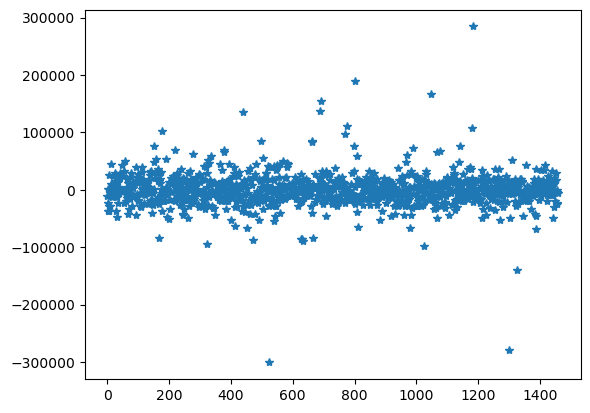

In [94]:
#first we plot the error
plt.plot(err_train, '*')

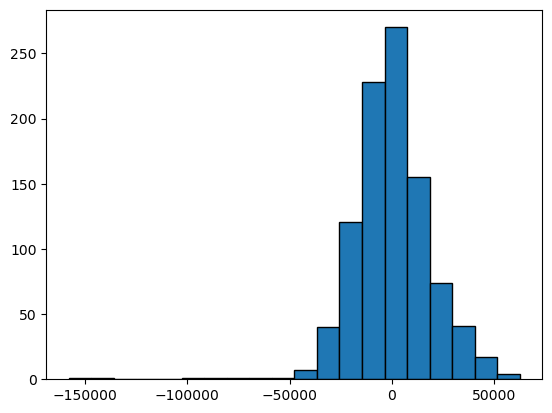

In [549]:
# now we plot histogram to check if error terms are normally distributed
plt.hist(err_train, bins=20, edgecolor='k');
#bins just increasing num or decreasing

In [551]:
# check the Homoscedacity
# Visualize predictions vs. actual values to check assumptions like linearity and homoscedasticity.
import seaborn as sns 

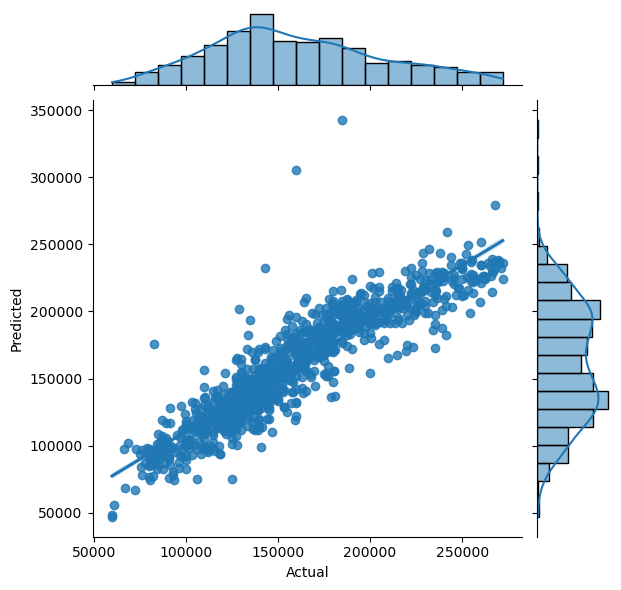

In [553]:
pred_actual_df = pd.DataFrame()
pred_actual_df['Actual'] = ppt_train_y
pred_actual_df['Predicted'] = pred_train

sns.jointplot(x='Actual', y='Predicted' , data=pred_actual_df,kind='reg')



In [497]:
# we need to remove this outliers

In [503]:
#  Define a function to remove outliers based on standard deviation.
def remove_outlier(df,col,k):
    mean = df[col].mean()
    global df1
    sd = df[col].std()
    final_list = [x for x in df[col] if (x > mean - k * sd)]
    final_list = [x for x in final_list if (x < mean + k * sd)]
    df1 = df.loc[df[col].isin(final_list)]; print(df1.shape)
    print('Number of outliers removed ---->' , df.shape[0] - df1.shape[0])
    


In [507]:
# Remove outliers from Sale_Price column using 2 standard deviations.
remove_outlier(ppt , 'Sale_Price' , 2)

(1286, 74)
Number of outliers removed ----> 65


In [ ]:
#  will remove the outliers and improve our model